## About Dataset

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Importing Libraries and Load Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import warnings
import os
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA - Exploratory Data Analaysis

In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Apply Model

In [ ]:
x=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [ ]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
model=KMeans(n_clusters=5)

In [ ]:
tahmin=model.fit(x)

In [ ]:
tahmin=model.predict(x)

In [ ]:
x["cluster"]=tahmin

In [ ]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,2
1,21,15,81,0
2,20,16,6,2
3,23,16,77,0
4,31,17,40,2


In [ ]:
silhouette_score(x,tahmin)

0.44495071184648644

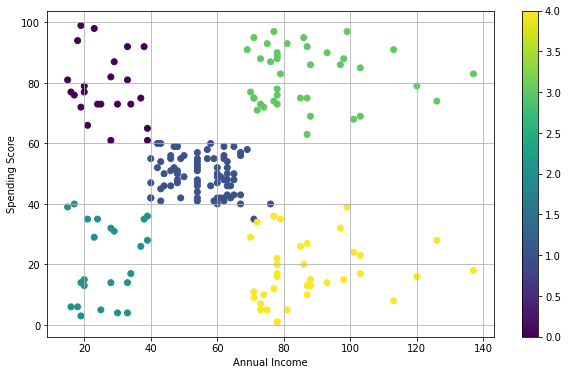

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=tahmin)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.colorbar()
plt.grid()

In [ ]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_ 
        print("Cluster",i,"score",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster 2 score 0.2929156379773513
Cluster 3 score 0.3845384138860551
Cluster 4 score 0.4074048047487967
Cluster 5 score 0.4442501217479051
Cluster 6 score 0.45258006358603936
Cluster 7 score 0.44228498754223233
Cluster 8 score 0.42796164382954494
Cluster 9 score 0.4147032823839611
Cluster 10 score 0.387735294085421
Cluster 11 score 0.36948616934838957


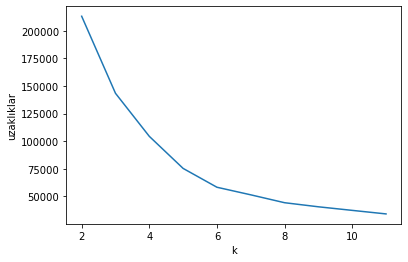

In [ ]:
plt.xlabel("k")
plt.ylabel("uzaklıklar")
plt.plot(allclusters,uzakliklar)